In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns

Only putting in code that was not presented in the class:

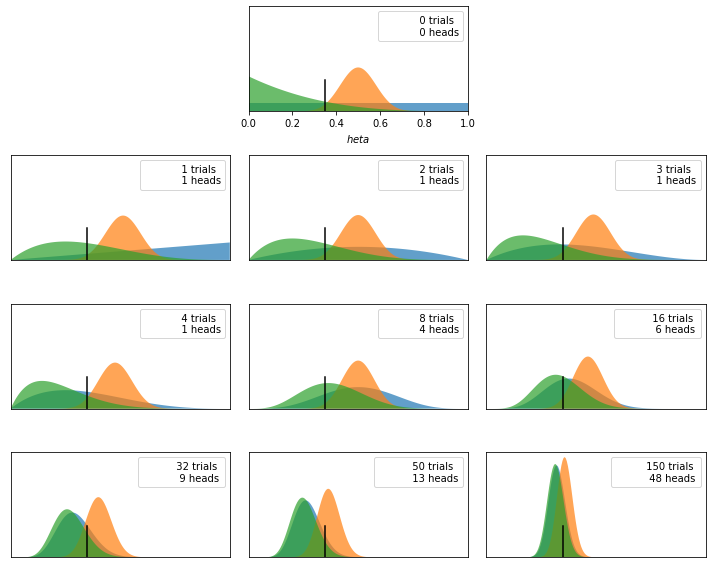

In [7]:
plt.figure(figsize = (10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials): 
    if idx == 0: 
        plt.subplot(4, 3, 2)
        plt.xlabel('$\theta$')
    else: 
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha = 0.7)
        
    plt.axvline(theta_real, ymax = 0.3, color = 'k')
    plt.plot(0, 0, label = f'{N:4d} trials \n{y:4d} heads', alpha = 0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

<AxesSubplot:title={'center':'θ'}>

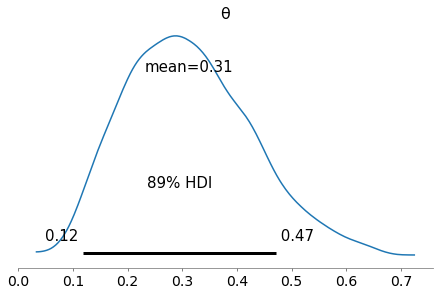

In [16]:
import arviz as az
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)}, hdi_prob = .89)

In [13]:
?az.plot_posterior